# Logistic and Delivery : Happy Customer

Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers.

X1 = my order was delivered on time.

X2 = contents of my order was as I expected.

X3 = I ordered everything I wanted to order.

X4 = I paid a good price for my order.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above.

Find which questions/features are more important when predicting a customer’s happiness.

## Imports

In [1052]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# scikit-learn modules for feature selection and model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Load the dataset

In [1053]:
# Load the dataset
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

# Print datatypes
print(df.dtypes)

# Describe columns
df.describe(include='all')

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object


,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [1054]:
# Preview the dataset
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Model Performance

In [1055]:
# Split feature and target vectors
X = df.drop("Y", 1)
Y = df["Y"]

In [1056]:
def fit_model(X, Y):
    '''Use model.'''
    
    # define the model to use
    model = RandomForestClassifier(n_estimators = 10, criterion = "entropy", max_depth = 5, random_state=47)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [1057]:
def calculate_metrics(model, X_test, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test)
    
    # Calculate evaluation metrics for assesing performance of the model.
    acc = accuracy_score(Y_test, y_predict_r)
    roc = roc_auc_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [1058]:
def train_and_get_metrics(X, Y):
    '''Train model and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    #scaler = StandardScaler().fit(X_train)
    #X_train_scaled = scaler.transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train, Y_train)

    # Make predictions on test dataset and calculate metrics.
    acc_test, roc_test, prec_test, rec_test, f1_test = calculate_metrics(model, X_test, Y_test)

    acc_train, roc_train, prec_train, rec_train, f1_train = calculate_metrics(model, X_train, Y_train)


    return acc_test, roc_test, prec_test, rec_test, f1_test, acc_train, roc_train, prec_train, rec_train, f1_train

In [1059]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc_test, roc_test, prec_test, rec_test, f1_test, acc_train, roc_train, prec_train, rec_train, f1_train = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df_test = pd.DataFrame([[acc_test, roc_test, prec_test, rec_test, f1_test, X.shape[1]]], columns=["Accuracy_test", "ROC_test", "Precision_test", "Recall_test", "F1 Score_test", 'Feature Count'])
    

    display_df_train = pd.DataFrame([[acc_train, roc_train, prec_train, rec_train, f1_train, X.shape[1]]], columns=["Accuracy_train", "ROC_train", "Precision_train", "Recall_train", "F1 Score_train", 'Feature Count'])
    



    return display_df_test, display_df_train 

In [1060]:
# Calculate evaluation metrics
all_features_eval_df, all_features_eval_df_train  = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

all_features_eval_df_train.index = ['All features']


# Initialize results dataframe
results_test = all_features_eval_df

results_train = all_features_eval_df_train

# Check the metrics
results_test.head()
#results_train.head()

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.5625,0.642857,0.6,6


In [1061]:
results_train.head()

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6


In [1062]:
# Remove the features with high correlation to other features
subset_feature_corr_names = ["X1", "X2", "X5", "X6"]


# Calculate and check evaluation metrics
subset_feature_eval_df, subset_feature_eval_df_train = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

subset_feature_eval_df_train.index = ['Subset features']



# Append to results and display
results_test = results_test.append(subset_feature_eval_df)

results_train = results_train.append(subset_feature_eval_df_train)

results_test.head(n=10)

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.562500,0.642857,0.600000,6
Subset features,0.769231,0.767857,0.785714,0.785714,0.785714,4


In [1063]:
results_train.head(n=10)

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6
Subset features,0.78,0.767677,0.753846,0.890909,0.816667,4


In [1064]:
df_features = df[["X1","X2","X3","X4","X5","X6"]]
df_features = df_features.replace(1, "Low")
df_features = df_features.replace(2, "Low")
df_features = df_features.replace(3, "Medium")
df_features = df_features.replace(4, "High")
df_features = df_features.replace(5, "High")
print(df_features.head())

       X1      X2      X3      X4      X5      X6
0  Medium  Medium  Medium    High     Low    High
1  Medium     Low  Medium    High    High  Medium
2    High  Medium  Medium  Medium  Medium    High
3    High    High  Medium  Medium  Medium    High
4    High    High  Medium  Medium  Medium    High


In [1065]:
LowMedHigh_onehot = pd.get_dummies(df_features)
print(LowMedHigh_onehot.head())

   X1_High  X1_Low  X1_Medium  X2_High  X2_Low  X2_Medium  X3_High  X3_Low  \
0        0       0          1        0       0          1        0       0   
1        0       0          1        0       1          0        0       0   
2        1       0          0        0       0          1        0       0   
3        1       0          0        1       0          0        0       0   
4        1       0          0        1       0          0        0       0   

   X3_Medium  X4_High  X4_Low  X4_Medium  X5_High  X5_Low  X5_Medium  X6_High  \
0          1        1       0          0        0       1          0        1   
1          1        1       0          0        1       0          0        0   
2          1        0       0          1        0       0          1        1   
3          1        0       0          1        0       0          1        1   
4          1        0       0          1        0       0          1        1   

   X6_Low  X6_Medium  
0       0          0 

In [1066]:

# Calculate and check evaluation metrics
LowMedHigh_onehot_eval_df, LowMedHigh_onehot_eval_df_train = evaluate_model_on_features(LowMedHigh_onehot, Y)
LowMedHigh_onehot_eval_df.index = ['LowMedHigh_onehot']

LowMedHigh_onehot_eval_df_train.index = ['LowMedHigh_onehot']


# Append to results and display
results_test = results_test.append(LowMedHigh_onehot_eval_df)

results_train = results_train.append(LowMedHigh_onehot_eval_df_train)

results_test.head(n=10)

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.562500,0.642857,0.600000,6
Subset features,0.769231,0.767857,0.785714,0.785714,0.785714,4
LowMedHigh_onehot,0.538462,0.535714,0.571429,0.571429,0.571429,18


In [1067]:

results_train.head(n=10)

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6
Subset features,0.78,0.767677,0.753846,0.890909,0.816667,4
LowMedHigh_onehot,0.75,0.732323,0.714286,0.909091,0.800000,18


In [1068]:
df_features_1to5 = df[["X1","X2","X3","X4","X5","X6"]]
df_features_1to5 = df_features_1to5.replace(1, "one")
df_features_1to5 = df_features_1to5.replace(2, "two")
df_features_1to5= df_features_1to5.replace(3, "three")
df_features_1to5 = df_features_1to5.replace(4, "four")
df_features_1to5 = df_features_1to5.replace(5, "five")
print(df_features_1to5.head())

      X1     X2     X3     X4     X5     X6
0  three  three  three   four    two   four
1  three    two  three   five   four  three
2   five  three  three  three  three   five
3   five   four  three  three  three   five
4   five   four  three  three  three   five


In [1069]:
df_features_1to5_onehot = pd.get_dummies(df_features_1to5)
print(df_features_1to5_onehot.head())

   X1_five  X1_four  X1_one  X1_three  X2_five  X2_four  X2_one  X2_three  \
0        0        0       0         1        0        0       0         1   
1        0        0       0         1        0        0       0         0   
2        1        0       0         0        0        0       0         1   
3        1        0       0         0        0        1       0         0   
4        1        0       0         0        0        1       0         0   

   X2_two  X3_five  ...  X5_five  X5_four  X5_one  X5_three  X5_two  X6_five  \
0       0        0  ...        0        0       0         0       1        0   
1       1        0  ...        0        1       0         0       0        0   
2       0        0  ...        0        0       0         1       0        1   
3       0        0  ...        0        0       0         1       0        1   
4       0        0  ...        0        0       0         1       0        1   

   X6_four  X6_one  X6_three  X6_two  
0        1       

In [1070]:
# Calculate and check evaluation metrics
OnetoFive_onehot_eval_df, OnetoFive_onehot_eval_df_train  = evaluate_model_on_features(df_features_1to5_onehot, Y)
OnetoFive_onehot_eval_df.index = ['OnetoFive_onehot']

OnetoFive_onehot_eval_df_train.index = ['OnetoFive_onehot']

# Append to results and display
results_test = results_test.append(OnetoFive_onehot_eval_df)
results_train = results_train.append(OnetoFive_onehot_eval_df_train)

results_test.head(n=10)

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.562500,0.642857,0.600000,6
Subset features,0.769231,0.767857,0.785714,0.785714,0.785714,4
LowMedHigh_onehot,0.538462,0.535714,0.571429,0.571429,0.571429,18
OnetoFive_onehot,0.769231,0.761905,0.750000,0.857143,0.800000,29


In [1071]:
results_train.head(n=10)

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6
Subset features,0.78,0.767677,0.753846,0.890909,0.816667,4
LowMedHigh_onehot,0.75,0.732323,0.714286,0.909091,0.800000,18
OnetoFive_onehot,0.83,0.817172,0.787879,0.945455,0.859504,29


## Feature Importance

In [1072]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [1073]:
feature_names = ["X1", "X2", "X3", "X4", "X5", "X6"] #[f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1074]:
import time



start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


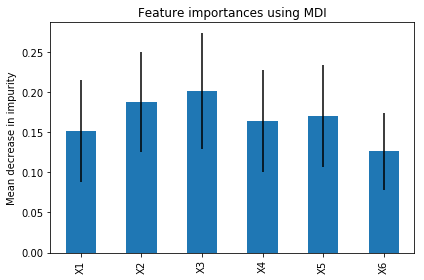

In [1075]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feauture imortance plot shows that there is no much difference among the features, however the top 3 are X2, X3, and X5

In [1076]:
# Important features
imp_features_names = ["X2", "X3", "X5"]


# Calculate and check evaluation metrics
imp_features_eval_df, imp_features_eval_df_train = evaluate_model_on_features(df[imp_features_names], Y)
imp_features_eval_df.index = ['Important features']

imp_features_eval_df_train.index = ['Important features']



# Append to results and display
results_test = results_test.append(imp_features_eval_df)

results_train = results_train.append(imp_features_eval_df_train)

results_test.head(n=10)

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.562500,0.642857,0.600000,6
Subset features,0.769231,0.767857,0.785714,0.785714,0.785714,4
LowMedHigh_onehot,0.538462,0.535714,0.571429,0.571429,0.571429,18
OnetoFive_onehot,0.769231,0.761905,0.750000,0.857143,0.800000,29
Important features,0.615385,0.613095,0.642857,0.642857,0.642857,3


In [1077]:
results_train.head(n=10)

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6
Subset features,0.78,0.767677,0.753846,0.890909,0.816667,4
LowMedHigh_onehot,0.75,0.732323,0.714286,0.909091,0.800000,18
OnetoFive_onehot,0.83,0.817172,0.787879,0.945455,0.859504,29
Important features,0.73,0.720202,0.725806,0.818182,0.769231,3


## References

[1] https://scikit-learn.org/stable/modules/cross_validation.html

[2] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[3] https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html